In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen as uReq


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import rcParams

%matplotlib inline

In [8]:
df = pd.read_csv('all_position_avg_pick_by_round.csv')

In [9]:
df

,Round,Rb,WR,QB,TE,K,DEF
0,1,7.000000,4.285714,0.428571,0.285714,0.000000,0.000000
1,2,5.000000,5.285714,0.857143,0.857143,0.000000,0.000000
2,3,4.142857,5.285714,1.571429,1.000000,0.000000,0.000000
3,4,4.000000,5.857143,1.571429,0.571429,0.000000,0.000000
4,5,3.714286,4.714286,2.000000,1.571429,0.000000,0.000000
5,6,3.142857,4.714286,2.714286,1.285714,0.000000,0.142857
6,7,3.714286,4.428571,2.142857,1.285714,0.142857,0.285714
7,8,2.714286,5.000000,2.000000,1.714286,0.000000,0.571429
8,9,3.571429,4.571429,1.428571,1.428571,0.428571,0.571429
9,10,2.857143,5.571429,1.714286,1.142857,0.142857,0.571429


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Round   15 non-null     int64  
 1   Rb      15 non-null     float64
 2   WR      15 non-null     float64
 3   QB      15 non-null     float64
 4   TE      15 non-null     float64
 5   K       15 non-null     float64
 6   DEF     15 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 968.0 bytes


In [23]:
rb = df['Rb']
wr = df['WR']
k = df['K']
dfs = df['DEF']
te = df['TE']
qb = df['QB']

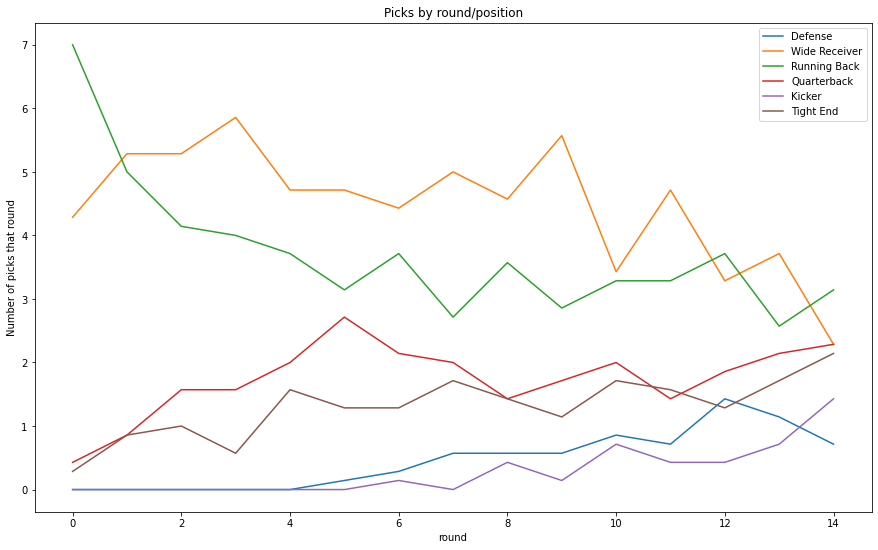

In [26]:
rcParams['figure.figsize'] = 15,9
plt.plot(dfs, label = "Defense")
plt.plot(wr, label = "Wide Receiver")
plt.plot(rb, label = "Running Back")
plt.plot(qb, label = "Quarterback")
plt.plot(k, label = "Kicker")
plt.plot(te, label = "Tight End")
#plt.grid(True)
plt.title('Picks by round/position')
plt.xlabel('round')
plt.ylabel('Number of picks that round')
plt.legend(loc = 1);

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['Rb'], "Round"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['QB'], "Round"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
sns.kdeplot(df.loc[df['WR'], "Round"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['TE'], "Round"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

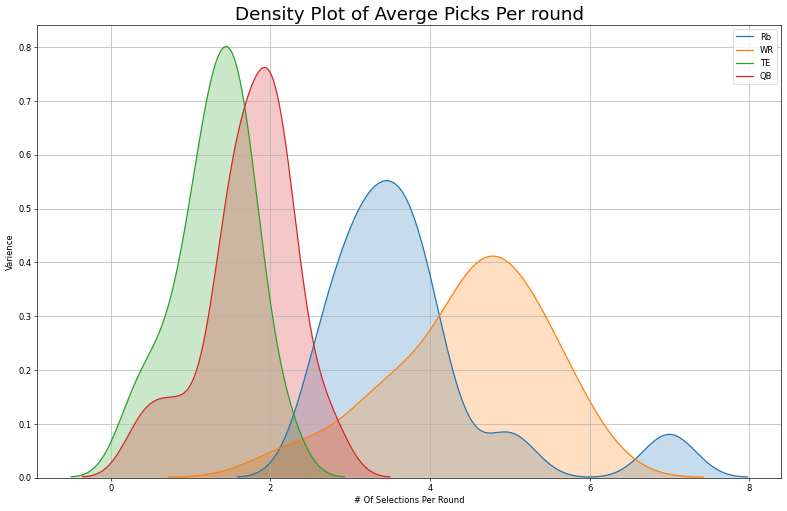

In [57]:
plt.figure(figsize=(16,10), dpi= 60)
sns.kdeplot(df.Rb, shade=True)
sns.kdeplot(df.WR, shade=True)
sns.kdeplot(df.TE, shade=True)
#sns.kdeplot(df.K, shade=True)
#sns.kdeplot(df.DEF, shade=True)
sns.kdeplot(df.QB, shade=True)
plt.title('Density Plot of Averge Picks Per round', fontsize=22)
plt.legend()
plt.xlabel('# Of Selections Per Round')
plt.ylabel('Varience')
plt.grid(True)
plt.show();

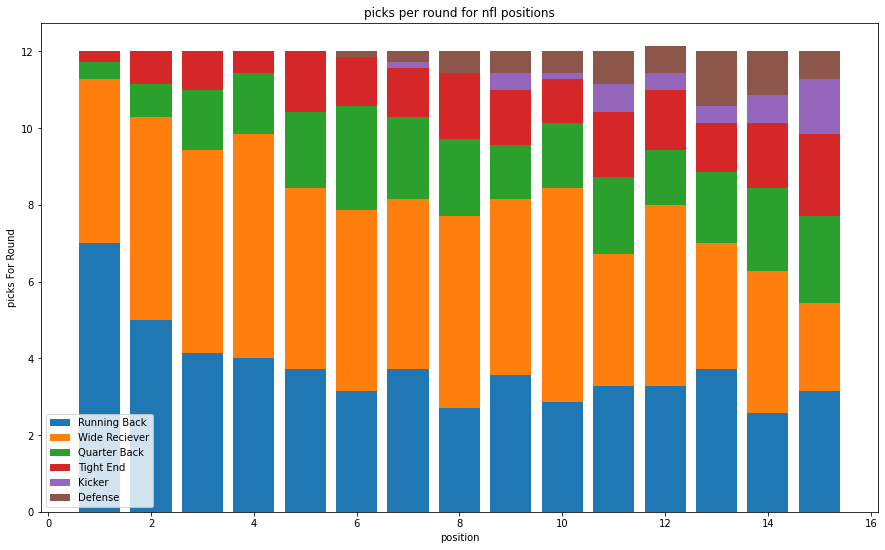

In [69]:
# stacked bar plot
plt.bar(df.Round,df.Rb, label = "Running Back")
plt.bar(df.Round,df.WR, label = "Wide Reciever", bottom = df.Rb)
plt.bar(df.Round, df.QB, label = "Quarter Back", bottom = (df.WR + df.Rb))
plt.bar(df.Round,df.TE, label = "Tight End", bottom = (df.QB + df.WR + df.Rb))
plt.bar(df.Round,df.K, label = "Kicker", bottom = (df.TE +df.QB + df.WR + df.Rb))
plt.bar(df.Round,df.DEF, label = "Defense", bottom = (df.K + df.TE +df.QB + df.WR + df.Rb))

plt.xlabel("position")
plt.ylabel("picks For Round")
plt.title("picks per round for nfl positions")
plt.legend()
#plt.grid(True)
plt.show()



# N = 5
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width,
#              bottom=menMeans, yerr=womenStd)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()

In [65]:
df

,Round,Rb,WR,QB,TE,K,DEF
0,1,7.000000,4.285714,0.428571,0.285714,0.000000,0.000000
1,2,5.000000,5.285714,0.857143,0.857143,0.000000,0.000000
2,3,4.142857,5.285714,1.571429,1.000000,0.000000,0.000000
3,4,4.000000,5.857143,1.571429,0.571429,0.000000,0.000000
4,5,3.714286,4.714286,2.000000,1.571429,0.000000,0.000000
5,6,3.142857,4.714286,2.714286,1.285714,0.000000,0.142857
6,7,3.714286,4.428571,2.142857,1.285714,0.142857,0.285714
7,8,2.714286,5.000000,2.000000,1.714286,0.000000,0.571429
8,9,3.571429,4.571429,1.428571,1.428571,0.428571,0.571429
9,10,2.857143,5.571429,1.714286,1.142857,0.142857,0.571429
